# Using RoboFlow dataset to detect people using MediaPipe


In [2]:
!pip install 'keras<3.0.0' mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 81.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-metadata to determine which version is compatible with other requirements. This could take

#### Import libraies

In [3]:
import os
import tensorflow as tf
assert tf.__version__.startswith('2')
from google.colab import files

from mediapipe_model_maker import object_detector

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Download dataset directly from Roboflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rda3pff5KNqzUs0cUoSA")
project = rf.workspace("yolodataset").project("person-detection-9a6mk")
version = project.version(1)
dataset = version.download("coco")


## Loading, training, and evaluating

In [9]:
class TransferLearning():
    """ Transfer Learning class for object detection using MediaPipe Model Maker
    2 datasets are required: train and validation

    Attributes:
        train_dataset_path: path to the train dataset
        validation_dataset_path: path to the validation dataset
        model: model to be trained
        train_data: train dataset
        validation_data: validation dataset
    """
    def __init__(self):
        self.train_dataset_path = "/content/drive/MyDrive/PeopleDetection/train"
        self.validation_dataset_path = "/content/drive/MyDrive/PeopleDetection/valid"
        self.model = None
        self.train_data = None
        self.validation_data = None
        self.hparams = None
        self.options = None

    def load_data(self):
        """ Load train and validation datasets from the given paths        """
        self.train_data = object_detector.Dataset.from_pascal_voc_folder(self.train_dataset_path)
        self.validation_data = object_detector.Dataset.from_pascal_voc_folder(self.validation_dataset_path)

    def train_model(self,batch_size=8, learning_rate=0.1, epochs=100, export_dir='exported_model'):
        """ Train the model using the loaded datasets

        Args:
            batch_size: batch size for training
            learning_rate: learning rate for training
            epochs: number of epochs for training
            export_dir: directory to export the trained model
        """
        self.hparams = object_detector.HParams(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, export_dir=export_dir)
        self.options = object_detector.ObjectDetectorOptions(
            supported_model=object_detector.SupportedModels.MOBILENET_V2,
            hparams=self.hparams
        )

        self.model = object_detector.ObjectDetector.create(
            train_data=self.train_data,
            validation_data=self.validation_data,
            options=self.options)

    def evaluate_model(self,batch_size=8):
        """ Evaluate the trained model

        Args:
            batch_size: batch size for evaluation
        """
        loss, metrics = self.model.evaluate(self.validation_data,batch_size)
        print(f"Validation loss: {loss}")
        print(f"Validation metrics: {metrics}")

    def export_model(self):
        """ Export the trained model """
        self.model.export_model('people-detection.tflite')
        print(f"Model exported")


In [10]:
TransferLearning_model = TransferLearning()
TransferLearning_model.load_data()



In [11]:
TransferLearning_model.train_model()

Using existing files at /tmp/model_maker/object_detector/mobilenetv2_i256
Model: "retina_net_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_1 (MobileNet)    {'2': (None, 64, 64, 24   2257984   
                             ),                                  
                              '3': (None, 32, 32, 32             
                             ),                                  
                              '4': (None, 16, 16, 96             
                             ),                                  
                              '5': (None, 8, 8, 320)             
                             , '6': (None, 8, 8, 128             
                             0)}                                 
                                                                 
 fpn_1 (FPN)                 {'5': (None, 8, 8, 128)   149056    
                             , '4': (Non

58/58 [==============================] - 56s 252ms/step - total_loss: 1.6840 - cls_loss: 1.4160 - box_loss: 0.0043 - model_loss: 1.6291 - val_total_loss: 1.3220 - val_cls_loss: 1.1915 - val_box_loss: 0.0015 - val_model_loss: 1.2671
Epoch 2/100
58/58 [==============================] - 10s 177ms/step - total_loss: 1.3179 - cls_loss: 1.1044 - box_loss: 0.0032 - model_loss: 1.2630 - val_total_loss: 1.0755 - val_cls_loss: 0.9413 - val_box_loss: 0.0016 - val_model_loss: 1.0205
Epoch 3/100
58/58 [==============================] - 10s 175ms/step - total_loss: 1.0288 - cls_loss: 0.8628 - box_loss: 0.0022 - model_loss: 0.9738 - val_total_loss: 0.8156 - val_cls_loss: 0.6887 - val_box_loss: 0.0014 - val_model_loss: 0.7607
Epoch 4/100
58/58 [==============================] - 10s 164ms/step - total_loss: 0.7748 - cls_loss: 0.6346 - box_loss: 0.0017 - model_loss: 0.7198 - val_total_loss: 0.6834 - val_cls_loss: 0.5618 - val_box_loss: 0.0013 - val_model_loss: 0.6285
Epoch 5/100
58/58 [=================

In [12]:
TransferLearning_model.evaluate_model(2)

21/21 [==============================] - 2s 39ms/step - total_loss: 0.3769 - cls_loss: 0.2622 - box_loss: 0.0012 - model_loss: 0.3225
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.774
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.955
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.905
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.778
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.834
 Average Recall     (AR) @[

In [13]:
TransferLearning_model.export_model()


Exporting a floating point model


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['6'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Model exported


## Plotting all loss values using matplotlib

C:\Users\aditi\AppData\Local\Temp\ipykernel_10248\1328990635.py:223: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2)


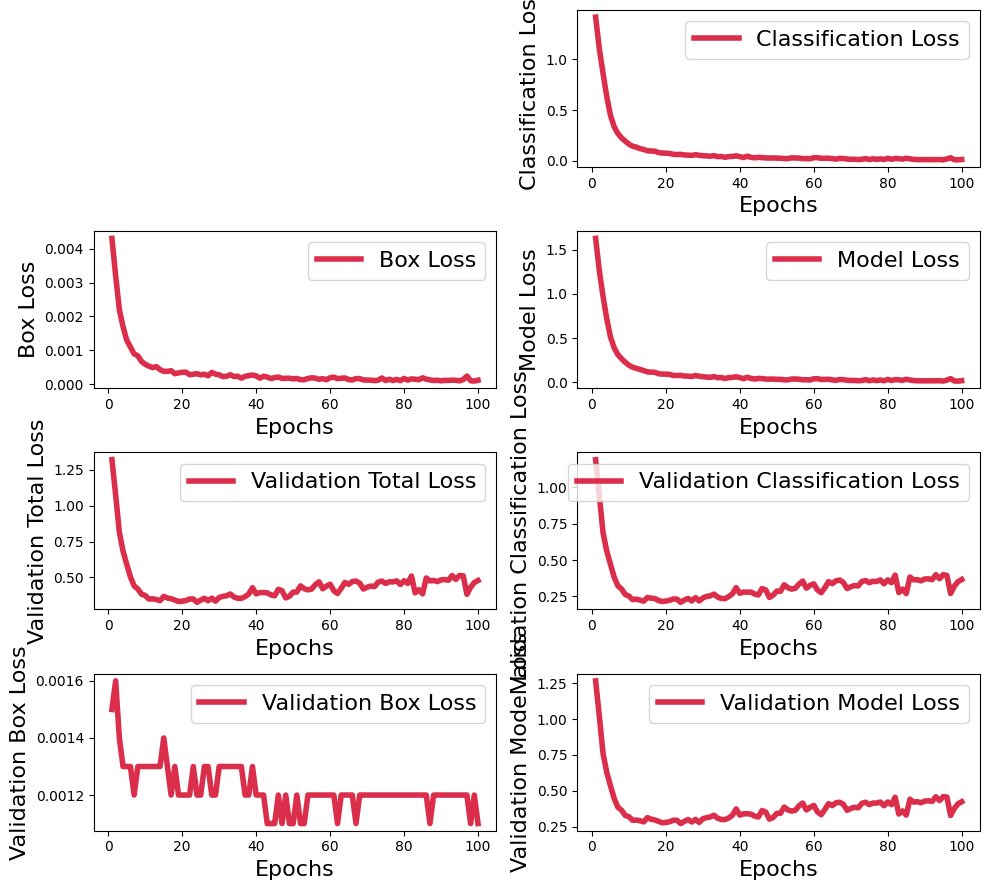

In [5]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# taken from the training log
txt_file = """
Epoch 1/100
58/58 [==============================] - 56s 252ms/step - total_loss: 1.6840 - cls_loss: 1.4160 - box_loss: 0.0043 - model_loss: 1.6291 - val_total_loss: 1.3220 - val_cls_loss: 1.1915 - val_box_loss: 0.0015 - val_model_loss: 1.2671
Epoch 2/100
58/58 [==============================] - 10s 177ms/step - total_loss: 1.3179 - cls_loss: 1.1044 - box_loss: 0.0032 - model_loss: 1.2630 - val_total_loss: 1.0755 - val_cls_loss: 0.9413 - val_box_loss: 0.0016 - val_model_loss: 1.0205
Epoch 3/100
58/58 [==============================] - 10s 175ms/step - total_loss: 1.0288 - cls_loss: 0.8628 - box_loss: 0.0022 - model_loss: 0.9738 - val_total_loss: 0.8156 - val_cls_loss: 0.6887 - val_box_loss: 0.0014 - val_model_loss: 0.7607
Epoch 4/100
58/58 [==============================] - 10s 164ms/step - total_loss: 0.7748 - cls_loss: 0.6346 - box_loss: 0.0017 - model_loss: 0.7198 - val_total_loss: 0.6834 - val_cls_loss: 0.5618 - val_box_loss: 0.0013 - val_model_loss: 0.6285
Epoch 5/100
58/58 [==============================] - 10s 174ms/step - total_loss: 0.5706 - cls_loss: 0.4493 - box_loss: 0.0013 - model_loss: 0.5156 - val_total_loss: 0.5903 - val_cls_loss: 0.4719 - val_box_loss: 0.0013 - val_model_loss: 0.5354
Epoch 6/100
58/58 [==============================] - 10s 172ms/step - total_loss: 0.4468 - cls_loss: 0.3364 - box_loss: 0.0011 - model_loss: 0.3918 - val_total_loss: 0.5029 - val_cls_loss: 0.3826 - val_box_loss: 0.0013 - val_model_loss: 0.4479
Epoch 7/100
58/58 [==============================] - 9s 152ms/step - total_loss: 0.3687 - cls_loss: 0.2690 - box_loss: 8.9543e-04 - model_loss: 0.3138 - val_total_loss: 0.4401 - val_cls_loss: 0.3230 - val_box_loss: 0.0012 - val_model_loss: 0.3851
Epoch 8/100
58/58 [==============================] - 10s 166ms/step - total_loss: 0.3224 - cls_loss: 0.2254 - box_loss: 8.4212e-04 - model_loss: 0.2675 - val_total_loss: 0.4191 - val_cls_loss: 0.3006 - val_box_loss: 0.0013 - val_model_loss: 0.3641
Epoch 9/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.2824 - cls_loss: 0.1937 - box_loss: 6.7377e-04 - model_loss: 0.2274 - val_total_loss: 0.3825 - val_cls_loss: 0.2630 - val_box_loss: 0.0013 - val_model_loss: 0.3276
Epoch 10/100
58/58 [==============================] - 10s 173ms/step - total_loss: 0.2482 - cls_loss: 0.1637 - box_loss: 5.9065e-04 - model_loss: 0.1932 - val_total_loss: 0.3733 - val_cls_loss: 0.2519 - val_box_loss: 0.0013 - val_model_loss: 0.3184
Epoch 11/100
58/58 [==============================] - 9s 153ms/step - total_loss: 0.2254 - cls_loss: 0.1436 - box_loss: 5.3736e-04 - model_loss: 0.1705 - val_total_loss: 0.3483 - val_cls_loss: 0.2275 - val_box_loss: 0.0013 - val_model_loss: 0.2934
Epoch 12/100
58/58 [==============================] - 11s 179ms/step - total_loss: 0.2134 - cls_loss: 0.1337 - box_loss: 4.9445e-04 - model_loss: 0.1584 - val_total_loss: 0.3503 - val_cls_loss: 0.2308 - val_box_loss: 0.0013 - val_model_loss: 0.2954
Epoch 13/100
58/58 [==============================] - 10s 170ms/step - total_loss: 0.2008 - cls_loss: 0.1197 - box_loss: 5.2362e-04 - model_loss: 0.1459 - val_total_loss: 0.3455 - val_cls_loss: 0.2242 - val_box_loss: 0.0013 - val_model_loss: 0.2906
Epoch 14/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.1877 - cls_loss: 0.1109 - box_loss: 4.3546e-04 - model_loss: 0.1327 - val_total_loss: 0.3372 - val_cls_loss: 0.2169 - val_box_loss: 0.0013 - val_model_loss: 0.2823
Epoch 15/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.1726 - cls_loss: 0.0985 - box_loss: 3.8342e-04 - model_loss: 0.1177 - val_total_loss: 0.3672 - val_cls_loss: 0.2423 - val_box_loss: 0.0014 - val_model_loss: 0.3123
Epoch 16/100
58/58 [==============================] - 9s 151ms/step - total_loss: 0.1703 - cls_loss: 0.0962 - box_loss: 3.8260e-04 - model_loss: 0.1154 - val_total_loss: 0.3559 - val_cls_loss: 0.2375 - val_box_loss: 0.0013 - val_model_loss: 0.3010
Epoch 17/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.1692 - cls_loss: 0.0941 - box_loss: 4.0279e-04 - model_loss: 0.1143 - val_total_loss: 0.3512 - val_cls_loss: 0.2347 - val_box_loss: 0.0012 - val_model_loss: 0.2962
Epoch 18/100
58/58 [==============================] - 10s 174ms/step - total_loss: 0.1515 - cls_loss: 0.0808 - box_loss: 3.1526e-04 - model_loss: 0.0966 - val_total_loss: 0.3413 - val_cls_loss: 0.2211 - val_box_loss: 0.0013 - val_model_loss: 0.2864
Epoch 19/100
58/58 [==============================] - 9s 155ms/step - total_loss: 0.1478 - cls_loss: 0.0760 - box_loss: 3.3900e-04 - model_loss: 0.0929 - val_total_loss: 0.3312 - val_cls_loss: 0.2146 - val_box_loss: 0.0012 - val_model_loss: 0.2763
Epoch 20/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.1476 - cls_loss: 0.0749 - box_loss: 3.5538e-04 - model_loss: 0.0927 - val_total_loss: 0.3337 - val_cls_loss: 0.2179 - val_box_loss: 0.0012 - val_model_loss: 0.2788
Epoch 21/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.1448 - cls_loss: 0.0719 - box_loss: 3.5935e-04 - model_loss: 0.0899 - val_total_loss: 0.3377 - val_cls_loss: 0.2228 - val_box_loss: 0.0012 - val_model_loss: 0.2828
Epoch 22/100
58/58 [==============================] - 9s 155ms/step - total_loss: 0.1327 - cls_loss: 0.0636 - box_loss: 2.8470e-04 - model_loss: 0.0778 - val_total_loss: 0.3492 - val_cls_loss: 0.2320 - val_box_loss: 0.0012 - val_model_loss: 0.2943
Epoch 23/100
58/58 [==============================] - 10s 167ms/step - total_loss: 0.1315 - cls_loss: 0.0617 - box_loss: 2.9893e-04 - model_loss: 0.0766 - val_total_loss: 0.3484 - val_cls_loss: 0.2308 - val_box_loss: 0.0013 - val_model_loss: 0.2935
Epoch 24/100
58/58 [==============================] - 11s 182ms/step - total_loss: 0.1334 - cls_loss: 0.0627 - box_loss: 3.1571e-04 - model_loss: 0.0785 - val_total_loss: 0.3256 - val_cls_loss: 0.2088 - val_box_loss: 0.0012 - val_model_loss: 0.2707
Epoch 25/100
58/58 [==============================] - 11s 179ms/step - total_loss: 0.1261 - cls_loss: 0.0573 - box_loss: 2.7877e-04 - model_loss: 0.0712 - val_total_loss: 0.3409 - val_cls_loss: 0.2243 - val_box_loss: 0.0012 - val_model_loss: 0.2860
Epoch 26/100
58/58 [==============================] - 10s 173ms/step - total_loss: 0.1251 - cls_loss: 0.0553 - box_loss: 2.9841e-04 - model_loss: 0.0702 - val_total_loss: 0.3539 - val_cls_loss: 0.2358 - val_box_loss: 0.0013 - val_model_loss: 0.2990
Epoch 27/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.1201 - cls_loss: 0.0526 - box_loss: 2.5220e-04 - model_loss: 0.0652 - val_total_loss: 0.3367 - val_cls_loss: 0.2183 - val_box_loss: 0.0013 - val_model_loss: 0.2819
Epoch 28/100
58/58 [==============================] - 10s 170ms/step - total_loss: 0.1321 - cls_loss: 0.0596 - box_loss: 3.5220e-04 - model_loss: 0.0772 - val_total_loss: 0.3546 - val_cls_loss: 0.2411 - val_box_loss: 0.0012 - val_model_loss: 0.2998
Epoch 29/100
58/58 [==============================] - 11s 180ms/step - total_loss: 0.1235 - cls_loss: 0.0536 - box_loss: 3.0165e-04 - model_loss: 0.0687 - val_total_loss: 0.3337 - val_cls_loss: 0.2186 - val_box_loss: 0.0012 - val_model_loss: 0.2788
Epoch 30/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.1185 - cls_loss: 0.0497 - box_loss: 2.8005e-04 - model_loss: 0.0637 - val_total_loss: 0.3595 - val_cls_loss: 0.2388 - val_box_loss: 0.0013 - val_model_loss: 0.3047
Epoch 31/100
58/58 [==============================] - 10s 166ms/step - total_loss: 0.1141 - cls_loss: 0.0478 - box_loss: 2.2938e-04 - model_loss: 0.0593 - val_total_loss: 0.3671 - val_cls_loss: 0.2495 - val_box_loss: 0.0013 - val_model_loss: 0.3123
Epoch 32/100
58/58 [==============================] - 10s 161ms/step - total_loss: 0.1108 - cls_loss: 0.0441 - box_loss: 2.3839e-04 - model_loss: 0.0560 - val_total_loss: 0.3715 - val_cls_loss: 0.2531 - val_box_loss: 0.0013 - val_model_loss: 0.3166
Epoch 33/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.1192 - cls_loss: 0.0502 - box_loss: 2.8361e-04 - model_loss: 0.0644 - val_total_loss: 0.3840 - val_cls_loss: 0.2656 - val_box_loss: 0.0013 - val_model_loss: 0.3292
Epoch 34/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.1068 - cls_loss: 0.0404 - box_loss: 2.3252e-04 - model_loss: 0.0520 - val_total_loss: 0.3632 - val_cls_loss: 0.2448 - val_box_loss: 0.0013 - val_model_loss: 0.3084
Epoch 35/100
58/58 [==============================] - 10s 173ms/step - total_loss: 0.1090 - cls_loss: 0.0422 - box_loss: 2.3928e-04 - model_loss: 0.0542 - val_total_loss: 0.3537 - val_cls_loss: 0.2356 - val_box_loss: 0.0013 - val_model_loss: 0.2989
Epoch 36/100
58/58 [==============================] - 10s 179ms/step - total_loss: 0.0979 - cls_loss: 0.0339 - box_loss: 1.8403e-04 - model_loss: 0.0431 - val_total_loss: 0.3536 - val_cls_loss: 0.2343 - val_box_loss: 0.0013 - val_model_loss: 0.2988
Epoch 37/100
58/58 [==============================] - 10s 167ms/step - total_loss: 0.1079 - cls_loss: 0.0413 - box_loss: 2.3589e-04 - model_loss: 0.0531 - val_total_loss: 0.3650 - val_cls_loss: 0.2485 - val_box_loss: 0.0012 - val_model_loss: 0.3102
Epoch 38/100
58/58 [==============================] - 10s 179ms/step - total_loss: 0.1102 - cls_loss: 0.0425 - box_loss: 2.5795e-04 - model_loss: 0.0554 - val_total_loss: 0.3840 - val_cls_loss: 0.2676 - val_box_loss: 0.0012 - val_model_loss: 0.3292
Epoch 39/100
58/58 [==============================] - 10s 179ms/step - total_loss: 0.1170 - cls_loss: 0.0485 - box_loss: 2.7531e-04 - model_loss: 0.0622 - val_total_loss: 0.4279 - val_cls_loss: 0.3101 - val_box_loss: 0.0013 - val_model_loss: 0.3731
Epoch 40/100
58/58 [==============================] - 10s 172ms/step - total_loss: 0.1080 - cls_loss: 0.0407 - box_loss: 2.5054e-04 - model_loss: 0.0532 - val_total_loss: 0.3845 - val_cls_loss: 0.2709 - val_box_loss: 0.0012 - val_model_loss: 0.3297
Epoch 41/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.0958 - cls_loss: 0.0318 - box_loss: 1.8255e-04 - model_loss: 0.0410 - val_total_loss: 0.3940 - val_cls_loss: 0.2801 - val_box_loss: 0.0012 - val_model_loss: 0.3392
Epoch 42/100
58/58 [==============================] - 10s 171ms/step - total_loss: 0.1120 - cls_loss: 0.0452 - box_loss: 2.3984e-04 - model_loss: 0.0572 - val_total_loss: 0.3940 - val_cls_loss: 0.2783 - val_box_loss: 0.0012 - val_model_loss: 0.3392
Epoch 43/100
58/58 [==============================] - 10s 178ms/step - total_loss: 0.0990 - cls_loss: 0.0335 - box_loss: 2.1403e-04 - model_loss: 0.0442 - val_total_loss: 0.3919 - val_cls_loss: 0.2798 - val_box_loss: 0.0011 - val_model_loss: 0.3371
Epoch 44/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.0924 - cls_loss: 0.0290 - box_loss: 1.7189e-04 - model_loss: 0.0376 - val_total_loss: 0.3776 - val_cls_loss: 0.2663 - val_box_loss: 0.0011 - val_model_loss: 0.3228
Epoch 45/100
58/58 [==============================] - 10s 164ms/step - total_loss: 0.0986 - cls_loss: 0.0338 - box_loss: 2.0052e-04 - model_loss: 0.0438 - val_total_loss: 0.3714 - val_cls_loss: 0.2597 - val_box_loss: 0.0011 - val_model_loss: 0.3166
Epoch 46/100
58/58 [==============================] - 10s 165ms/step - total_loss: 0.0973 - cls_loss: 0.0318 - box_loss: 2.1465e-04 - model_loss: 0.0426 - val_total_loss: 0.4166 - val_cls_loss: 0.3036 - val_box_loss: 0.0012 - val_model_loss: 0.3618
Epoch 47/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.0911 - cls_loss: 0.0276 - box_loss: 1.7565e-04 - model_loss: 0.0364 - val_total_loss: 0.4060 - val_cls_loss: 0.2948 - val_box_loss: 0.0011 - val_model_loss: 0.3513
Epoch 48/100
58/58 [==============================] - 10s 163ms/step - total_loss: 0.0904 - cls_loss: 0.0267 - box_loss: 1.7916e-04 - model_loss: 0.0357 - val_total_loss: 0.3567 - val_cls_loss: 0.2423 - val_box_loss: 0.0012 - val_model_loss: 0.3019
Epoch 49/100
58/58 [==============================] - 10s 167ms/step - total_loss: 0.0914 - cls_loss: 0.0275 - box_loss: 1.8115e-04 - model_loss: 0.0366 - val_total_loss: 0.3682 - val_cls_loss: 0.2583 - val_box_loss: 0.0011 - val_model_loss: 0.3134
Epoch 50/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0884 - cls_loss: 0.0255 - box_loss: 1.6281e-04 - model_loss: 0.0336 - val_total_loss: 0.3971 - val_cls_loss: 0.2865 - val_box_loss: 0.0011 - val_model_loss: 0.3423
Epoch 51/100
58/58 [==============================] - 10s 168ms/step - total_loss: 0.0885 - cls_loss: 0.0251 - box_loss: 1.7322e-04 - model_loss: 0.0338 - val_total_loss: 0.3973 - val_cls_loss: 0.2851 - val_box_loss: 0.0012 - val_model_loss: 0.3426
Epoch 52/100
58/58 [==============================] - 10s 166ms/step - total_loss: 0.0823 - cls_loss: 0.0206 - box_loss: 1.4011e-04 - model_loss: 0.0276 - val_total_loss: 0.4406 - val_cls_loss: 0.3295 - val_box_loss: 0.0011 - val_model_loss: 0.3859
Epoch 53/100
58/58 [==============================] - 10s 178ms/step - total_loss: 0.0823 - cls_loss: 0.0208 - box_loss: 1.3599e-04 - model_loss: 0.0276 - val_total_loss: 0.4206 - val_cls_loss: 0.3097 - val_box_loss: 0.0011 - val_model_loss: 0.3659
Epoch 54/100
58/58 [==============================] - 10s 178ms/step - total_loss: 0.0920 - cls_loss: 0.0286 - box_loss: 1.7394e-04 - model_loss: 0.0373 - val_total_loss: 0.4128 - val_cls_loss: 0.2998 - val_box_loss: 0.0012 - val_model_loss: 0.3581
Epoch 55/100
58/58 [==============================] - 9s 160ms/step - total_loss: 0.0919 - cls_loss: 0.0275 - box_loss: 1.9294e-04 - model_loss: 0.0372 - val_total_loss: 0.4181 - val_cls_loss: 0.3057 - val_box_loss: 0.0012 - val_model_loss: 0.3634
Epoch 56/100
58/58 [==============================] - 10s 170ms/step - total_loss: 0.0902 - cls_loss: 0.0263 - box_loss: 1.8331e-04 - model_loss: 0.0355 - val_total_loss: 0.4495 - val_cls_loss: 0.3346 - val_box_loss: 0.0012 - val_model_loss: 0.3947
Epoch 57/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0830 - cls_loss: 0.0208 - box_loss: 1.5004e-04 - model_loss: 0.0283 - val_total_loss: 0.4688 - val_cls_loss: 0.3553 - val_box_loss: 0.0012 - val_model_loss: 0.4141
Epoch 58/100
58/58 [==============================] - 10s 163ms/step - total_loss: 0.0844 - cls_loss: 0.0213 - box_loss: 1.6770e-04 - model_loss: 0.0296 - val_total_loss: 0.4206 - val_cls_loss: 0.3064 - val_box_loss: 0.0012 - val_model_loss: 0.3659
Epoch 59/100
58/58 [==============================] - 10s 165ms/step - total_loss: 0.0810 - cls_loss: 0.0194 - box_loss: 1.3744e-04 - model_loss: 0.0263 - val_total_loss: 0.4386 - val_cls_loss: 0.3259 - val_box_loss: 0.0012 - val_model_loss: 0.3839
Epoch 60/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0951 - cls_loss: 0.0306 - box_loss: 1.9614e-04 - model_loss: 0.0404 - val_total_loss: 0.4522 - val_cls_loss: 0.3364 - val_box_loss: 0.0012 - val_model_loss: 0.3975
Epoch 61/100
58/58 [==============================] - 10s 172ms/step - total_loss: 0.0954 - cls_loss: 0.0300 - box_loss: 2.1344e-04 - model_loss: 0.0407 - val_total_loss: 0.4065 - val_cls_loss: 0.2938 - val_box_loss: 0.0012 - val_model_loss: 0.3518
Epoch 62/100
58/58 [==============================] - 10s 163ms/step - total_loss: 0.0871 - cls_loss: 0.0240 - box_loss: 1.6807e-04 - model_loss: 0.0324 - val_total_loss: 0.3872 - val_cls_loss: 0.2751 - val_box_loss: 0.0011 - val_model_loss: 0.3325
Epoch 63/100
58/58 [==============================] - 10s 178ms/step - total_loss: 0.0879 - cls_loss: 0.0243 - box_loss: 1.7826e-04 - model_loss: 0.0332 - val_total_loss: 0.4237 - val_cls_loss: 0.3096 - val_box_loss: 0.0012 - val_model_loss: 0.3690
Epoch 64/100
58/58 [==============================] - 11s 182ms/step - total_loss: 0.0890 - cls_loss: 0.0248 - box_loss: 1.9046e-04 - model_loss: 0.0343 - val_total_loss: 0.4644 - val_cls_loss: 0.3517 - val_box_loss: 0.0012 - val_model_loss: 0.4098
Epoch 65/100
58/58 [==============================] - 10s 168ms/step - total_loss: 0.0822 - cls_loss: 0.0205 - box_loss: 1.4229e-04 - model_loss: 0.0276 - val_total_loss: 0.4514 - val_cls_loss: 0.3372 - val_box_loss: 0.0012 - val_model_loss: 0.3967
Epoch 66/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.0771 - cls_loss: 0.0159 - box_loss: 1.3080e-04 - model_loss: 0.0225 - val_total_loss: 0.4708 - val_cls_loss: 0.3569 - val_box_loss: 0.0012 - val_model_loss: 0.4161
Epoch 67/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.0865 - cls_loss: 0.0234 - box_loss: 1.6953e-04 - model_loss: 0.0318 - val_total_loss: 0.4741 - val_cls_loss: 0.3623 - val_box_loss: 0.0011 - val_model_loss: 0.4194
Epoch 68/100
58/58 [==============================] - 10s 174ms/step - total_loss: 0.0853 - cls_loss: 0.0222 - box_loss: 1.6866e-04 - model_loss: 0.0306 - val_total_loss: 0.4597 - val_cls_loss: 0.3457 - val_box_loss: 0.0012 - val_model_loss: 0.4051
Epoch 69/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0781 - cls_loss: 0.0169 - box_loss: 1.3151e-04 - model_loss: 0.0234 - val_total_loss: 0.4184 - val_cls_loss: 0.3038 - val_box_loss: 0.0012 - val_model_loss: 0.3638
Epoch 70/100
58/58 [==============================] - 9s 155ms/step - total_loss: 0.0753 - cls_loss: 0.0144 - box_loss: 1.2593e-04 - model_loss: 0.0207 - val_total_loss: 0.4311 - val_cls_loss: 0.3157 - val_box_loss: 0.0012 - val_model_loss: 0.3765
Epoch 71/100
58/58 [==============================] - 10s 171ms/step - total_loss: 0.0759 - cls_loss: 0.0150 - box_loss: 1.2473e-04 - model_loss: 0.0212 - val_total_loss: 0.4392 - val_cls_loss: 0.3247 - val_box_loss: 0.0012 - val_model_loss: 0.3845
Epoch 72/100
58/58 [==============================] - 10s 180ms/step - total_loss: 0.0723 - cls_loss: 0.0121 - box_loss: 1.1128e-04 - model_loss: 0.0177 - val_total_loss: 0.4354 - val_cls_loss: 0.3218 - val_box_loss: 0.0012 - val_model_loss: 0.3808
Epoch 73/100
58/58 [==============================] - 10s 173ms/step - total_loss: 0.0748 - cls_loss: 0.0141 - box_loss: 1.2190e-04 - model_loss: 0.0202 - val_total_loss: 0.4666 - val_cls_loss: 0.3523 - val_box_loss: 0.0012 - val_model_loss: 0.4119
Epoch 74/100
58/58 [==============================] - 9s 155ms/step - total_loss: 0.0854 - cls_loss: 0.0213 - box_loss: 1.8931e-04 - model_loss: 0.0307 - val_total_loss: 0.4744 - val_cls_loss: 0.3593 - val_box_loss: 0.0012 - val_model_loss: 0.4197
Epoch 75/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.0722 - cls_loss: 0.0119 - box_loss: 1.1367e-04 - model_loss: 0.0176 - val_total_loss: 0.4579 - val_cls_loss: 0.3441 - val_box_loss: 0.0012 - val_model_loss: 0.4033
Epoch 76/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0816 - cls_loss: 0.0194 - box_loss: 1.5098e-04 - model_loss: 0.0270 - val_total_loss: 0.4687 - val_cls_loss: 0.3540 - val_box_loss: 0.0012 - val_model_loss: 0.4141
Epoch 77/100
58/58 [==============================] - 9s 162ms/step - total_loss: 0.0740 - cls_loss: 0.0136 - box_loss: 1.1443e-04 - model_loss: 0.0194 - val_total_loss: 0.4685 - val_cls_loss: 0.3520 - val_box_loss: 0.0012 - val_model_loss: 0.4139
Epoch 78/100
58/58 [==============================] - 10s 169ms/step - total_loss: 0.0807 - cls_loss: 0.0188 - box_loss: 1.4684e-04 - model_loss: 0.0261 - val_total_loss: 0.4757 - val_cls_loss: 0.3635 - val_box_loss: 0.0012 - val_model_loss: 0.4211
Epoch 79/100
58/58 [==============================] - 10s 177ms/step - total_loss: 0.0723 - cls_loss: 0.0122 - box_loss: 1.0911e-04 - model_loss: 0.0177 - val_total_loss: 0.4502 - val_cls_loss: 0.3363 - val_box_loss: 0.0012 - val_model_loss: 0.3956
Epoch 80/100
58/58 [==============================] - 9s 162ms/step - total_loss: 0.0878 - cls_loss: 0.0246 - box_loss: 1.7331e-04 - model_loss: 0.0332 - val_total_loss: 0.4763 - val_cls_loss: 0.3634 - val_box_loss: 0.0012 - val_model_loss: 0.4218
Epoch 81/100
58/58 [==============================] - 10s 165ms/step - total_loss: 0.0754 - cls_loss: 0.0145 - box_loss: 1.2602e-04 - model_loss: 0.0208 - val_total_loss: 0.4573 - val_cls_loss: 0.3443 - val_box_loss: 0.0012 - val_model_loss: 0.4027
Epoch 82/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0851 - cls_loss: 0.0225 - box_loss: 1.6131e-04 - model_loss: 0.0305 - val_total_loss: 0.5093 - val_cls_loss: 0.3963 - val_box_loss: 0.0012 - val_model_loss: 0.4547
Epoch 83/100
58/58 [==============================] - 10s 179ms/step - total_loss: 0.0828 - cls_loss: 0.0206 - box_loss: 1.5127e-04 - model_loss: 0.0282 - val_total_loss: 0.3922 - val_cls_loss: 0.2761 - val_box_loss: 0.0012 - val_model_loss: 0.3376
Epoch 84/100
58/58 [==============================] - 9s 155ms/step - total_loss: 0.0770 - cls_loss: 0.0156 - box_loss: 1.3726e-04 - model_loss: 0.0224 - val_total_loss: 0.4139 - val_cls_loss: 0.2999 - val_box_loss: 0.0012 - val_model_loss: 0.3594
Epoch 85/100
58/58 [==============================] - 10s 171ms/step - total_loss: 0.0891 - cls_loss: 0.0249 - box_loss: 1.9203e-04 - model_loss: 0.0345 - val_total_loss: 0.3845 - val_cls_loss: 0.2690 - val_box_loss: 0.0012 - val_model_loss: 0.3299
Epoch 86/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0809 - cls_loss: 0.0187 - box_loss: 1.5295e-04 - model_loss: 0.0263 - val_total_loss: 0.4956 - val_cls_loss: 0.3830 - val_box_loss: 0.0012 - val_model_loss: 0.4410
Epoch 87/100
58/58 [==============================] - 9s 153ms/step - total_loss: 0.0750 - cls_loss: 0.0139 - box_loss: 1.3147e-04 - model_loss: 0.0205 - val_total_loss: 0.4752 - val_cls_loss: 0.3636 - val_box_loss: 0.0011 - val_model_loss: 0.4206
Epoch 88/100
58/58 [==============================] - 10s 164ms/step - total_loss: 0.0719 - cls_loss: 0.0116 - box_loss: 1.1507e-04 - model_loss: 0.0173 - val_total_loss: 0.4785 - val_cls_loss: 0.3651 - val_box_loss: 0.0012 - val_model_loss: 0.4239
Epoch 89/100
58/58 [==============================] - 10s 176ms/step - total_loss: 0.0716 - cls_loss: 0.0110 - box_loss: 1.2134e-04 - model_loss: 0.0171 - val_total_loss: 0.4705 - val_cls_loss: 0.3568 - val_box_loss: 0.0012 - val_model_loss: 0.4159
Epoch 90/100
58/58 [==============================] - 10s 167ms/step - total_loss: 0.0709 - cls_loss: 0.0111 - box_loss: 1.0513e-04 - model_loss: 0.0163 - val_total_loss: 0.4822 - val_cls_loss: 0.3693 - val_box_loss: 0.0012 - val_model_loss: 0.4277
Epoch 91/100
58/58 [==============================] - 10s 163ms/step - total_loss: 0.0724 - cls_loss: 0.0120 - box_loss: 1.1755e-04 - model_loss: 0.0179 - val_total_loss: 0.4846 - val_cls_loss: 0.3707 - val_box_loss: 0.0012 - val_model_loss: 0.4301
Epoch 92/100
58/58 [==============================] - 11s 180ms/step - total_loss: 0.0713 - cls_loss: 0.0109 - box_loss: 1.1785e-04 - model_loss: 0.0168 - val_total_loss: 0.4797 - val_cls_loss: 0.3647 - val_box_loss: 0.0012 - val_model_loss: 0.4252
Epoch 93/100
58/58 [==============================] - 10s 175ms/step - total_loss: 0.0720 - cls_loss: 0.0113 - box_loss: 1.2314e-04 - model_loss: 0.0175 - val_total_loss: 0.5127 - val_cls_loss: 0.3989 - val_box_loss: 0.0012 - val_model_loss: 0.4581
Epoch 94/100
58/58 [==============================] - 11s 179ms/step - total_loss: 0.0727 - cls_loss: 0.0121 - box_loss: 1.2106e-04 - model_loss: 0.0181 - val_total_loss: 0.4858 - val_cls_loss: 0.3714 - val_box_loss: 0.0012 - val_model_loss: 0.4313
Epoch 95/100
58/58 [==============================] - 11s 181ms/step - total_loss: 0.0688 - cls_loss: 0.0090 - box_loss: 1.0485e-04 - model_loss: 0.0143 - val_total_loss: 0.5133 - val_cls_loss: 0.3996 - val_box_loss: 0.0012 - val_model_loss: 0.4588
Epoch 96/100
58/58 [==============================] - 10s 170ms/step - total_loss: 0.0794 - cls_loss: 0.0179 - box_loss: 1.3938e-04 - model_loss: 0.0249 - val_total_loss: 0.5106 - val_cls_loss: 0.3938 - val_box_loss: 0.0012 - val_model_loss: 0.4561
Epoch 97/100
58/58 [==============================] - 11s 184ms/step - total_loss: 0.0961 - cls_loss: 0.0294 - box_loss: 2.4545e-04 - model_loss: 0.0417 - val_total_loss: 0.3818 - val_cls_loss: 0.2698 - val_box_loss: 0.0012 - val_model_loss: 0.3273
Epoch 98/100
58/58 [==============================] - 10s 178ms/step - total_loss: 0.0697 - cls_loss: 0.0098 - box_loss: 1.0849e-04 - model_loss: 0.0152 - val_total_loss: 0.4305 - val_cls_loss: 0.3191 - val_box_loss: 0.0011 - val_model_loss: 0.3760
Epoch 99/100
58/58 [==============================] - 9s 154ms/step - total_loss: 0.0684 - cls_loss: 0.0091 - box_loss: 9.6806e-05 - model_loss: 0.0139 - val_total_loss: 0.4636 - val_cls_loss: 0.3514 - val_box_loss: 0.0012 - val_model_loss: 0.4091
Epoch 100/100
58/58 [==============================] - 10s 174ms/step - total_loss: 0.0729 - cls_loss: 0.0124 - box_loss: 1.2146e-04 - model_loss: 0.0185 - val_total_loss: 0.4777 - val_cls_loss: 0.3659 - val_box_loss: 0.0011 - val_model_loss: 0.4232
"""
pattern = r"total_loss: (\d+\.\d+(?:e[+-]?\d+)?) - cls_loss: (\d+\.\d+(?:e[+-]?\d+)?) - box_loss: (\d+\.\d+(?:e[+-]?\d+)?) - model_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_total_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_cls_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_box_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_model_loss: (\d+\.\d+(?:e[+-]?\d+)?)"

matches = re.findall(pattern, txt_file)
# Convert the matched strings to float and separate them into lists
total_losses, cls_losses, box_losses, model_losses, val_total_losses, val_cls_losses, val_box_losses, val_model_losses = zip(*((float(total), float(cls), float(box), float(model), float(val_total), float(val_cls), float(val_box), float(val_model)) 
                                                           for total, cls, box, model,val_total, val_cls, val_box, val_model in matches))

epochs = range(1, len(total_losses) + 1)

plt.figure(figsize=(10,9))
plt.plot(epochs, total_losses, ('#DB2E4B'), label="Total Loss", linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Total Loss",fontsize=16)
plt.legend(fontsize=16)

plt.subplot(4, 2, 2)
plt.plot(epochs, cls_losses, ('#DB2E4B'), label="Classification Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Classification Loss",fontsize=16)
plt.legend(fontsize=16)

plt.subplot(4, 2, 3)
plt.plot(epochs, box_losses, ('#DB2E4B'), label="Box Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Box Loss",fontsize=16)
plt.legend(fontsize=16)

plt.subplot(4, 2,4)
plt.plot(epochs, model_losses, ('#DB2E4B'), label="Model Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Model Loss",fontsize=16)
plt.legend(fontsize=16)


plt.subplot(4, 2, 5)
plt.plot(epochs, val_total_losses, ('#DB2E4B'), label="Validation Total Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Validation Total Loss",fontsize=16)
plt.legend(fontsize=16)

plt.subplot(4, 2, 6)
plt.plot(epochs, val_cls_losses, ('#DB2E4B'), label="Validation Classification Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Validation Classification Loss",fontsize=16)
plt.legend(fontsize=16)

plt.subplot(4, 2, 7)
plt.plot(epochs, val_box_losses, ('#DB2E4B'), label="Validation Box Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Validation Box Loss",fontsize=16)
plt.legend(fontsize=16)

plt.subplot(4, 2, 8)
plt.plot(epochs, val_model_losses, ('#DB2E4B'), label="Validation Model Loss",linewidth=4)
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("Validation Model Loss",fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()



## Plotting average precision, average recall based on the IoU threshold

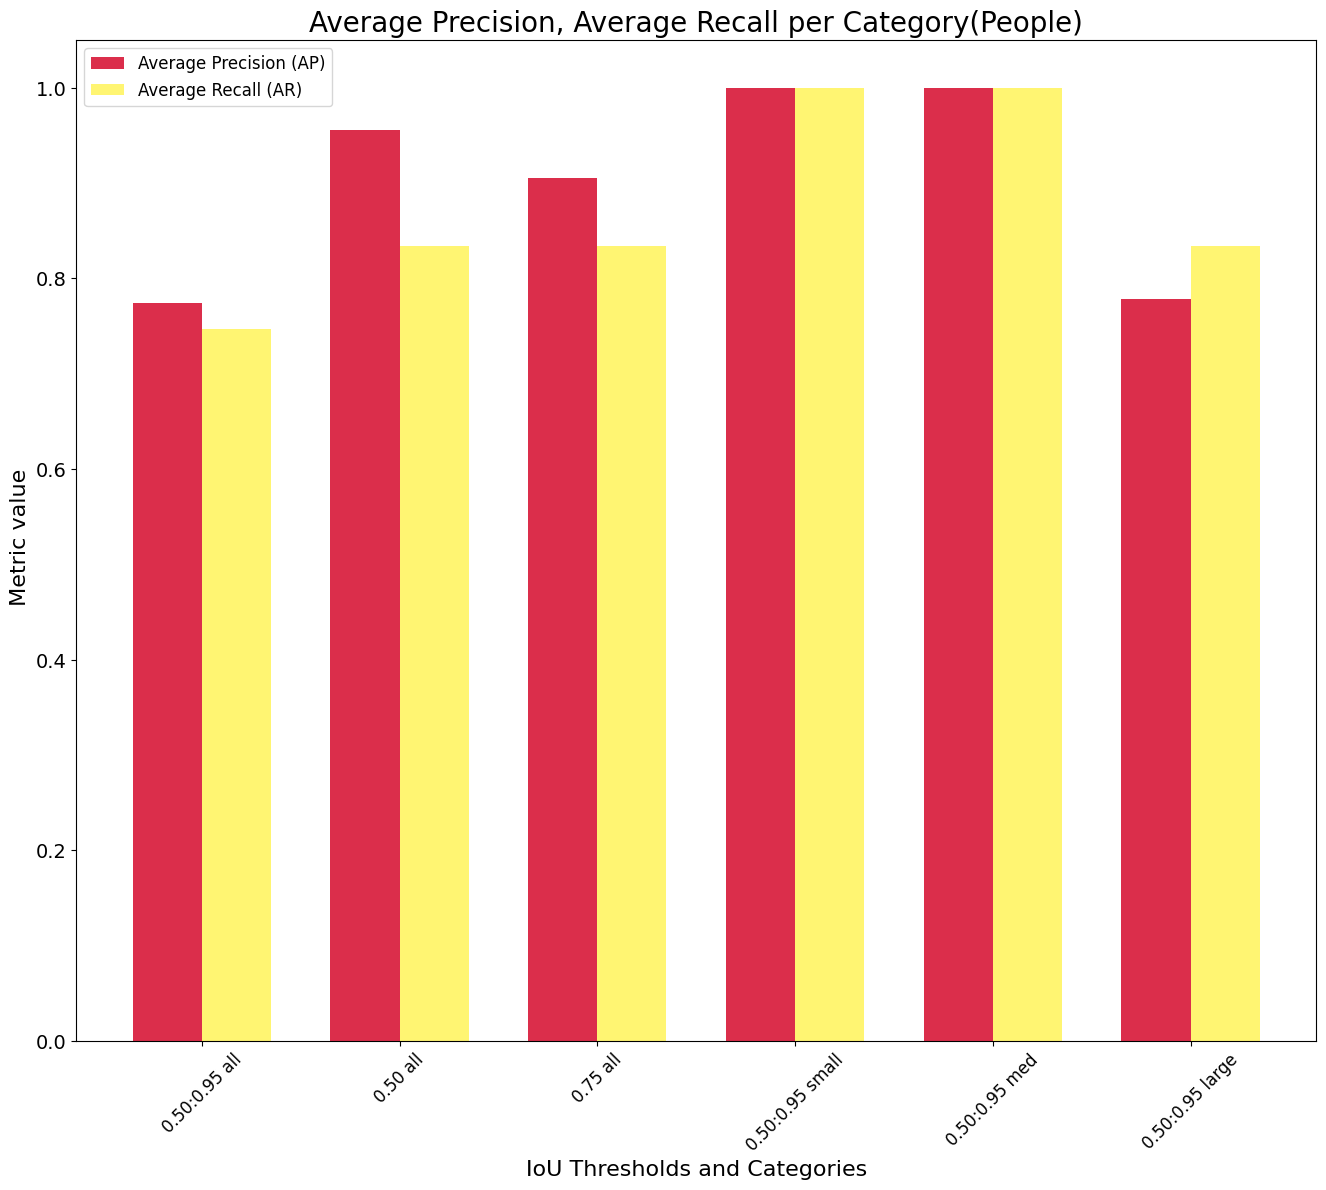

In [2]:

import matplotlib.pyplot as plt
import numpy as np

#Given data
metrics = {
    'AP': [0.774, 0.955, 0.905, 1.000,1.000, 0.778],
    'AR': [0.747, 0.834, 0.834,1.000, 1.000, 0.834]
}
categories = ['0.50:0.95 all', '0.50 all', '0.75 all',
              '0.50:0.95 small', '0.50:0.95 med', '0.50:0.95 large']
# Create a bar plot for AP and AR with bars side by side
bar_width = 0.35  # the width of the bars
index = np.arange(len(metrics['AP']))  # the label locations

fig, ax1 = plt.subplots(figsize=(16,13))

# Bar plots
rects1 = ax1.bar(index - bar_width/2, metrics['AP'], bar_width, label='Average Precision (AP)', color='#DB2E4B') # noqa
rects2 = ax1.bar(index + bar_width/2, metrics['AR'], bar_width, label='Average Recall (AR)', color='#FFF572') # noqa


# Labels and legends
ax1.set_xlabel('IoU Thresholds and Categories',fontsize=16)
ax1.set_ylabel(' Metric value',fontsize=16)
ax1.set_title('Average Precision, Average Recall per Category(People)',fontsize=20)

# Adjust tick label size (new)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_xticks(index)
ax1.set_xticklabels(categories, rotation=45, fontsize=12)

ax1.legend(loc='upper left',fontsize = 'large')
plt.savefig('barplot.png')
plt.show()
